## Exercise for k means tutorial

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data[:, 2:], columns=['length', 'width'])
df.head()

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


<AxesSubplot:xlabel='length', ylabel='width'>

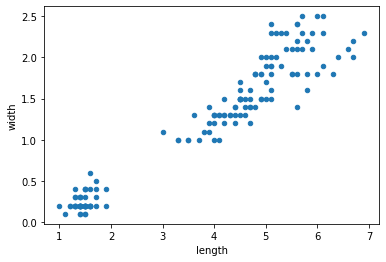

In [3]:
df.plot.scatter('length', 'width')

In [4]:
scaler = MinMaxScaler()

scaler.fit(df[['length']])
df['length'] = scaler.transform(df[['length']])

scaler.fit(df[['width']])
df['width'] = scaler.transform(df[['width']])

In [5]:
df.head()

,length,width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


<AxesSubplot:xlabel='length', ylabel='width'>

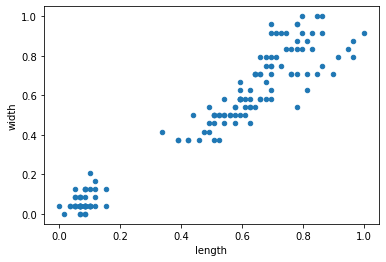

In [6]:
df.plot.scatter('length', 'width')

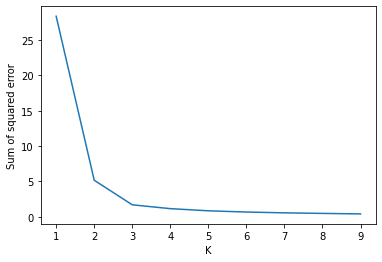

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['length','width']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km_2 = KMeans(n_clusters=2)
df['div_2'] = km_2.fit_predict(df[['length','width']])

km_3 = KMeans(n_clusters=3)
df['div_3'] = km_3.fit_predict(df[['length','width']])

df.head()

,length,width,div_2,div_3
0,0.067797,0.041667,1,1
1,0.067797,0.041667,1,1
2,0.050847,0.041667,1,1
3,0.084746,0.041667,1,1
4,0.067797,0.041667,1,1


<AxesSubplot:xlabel='length', ylabel='width'>

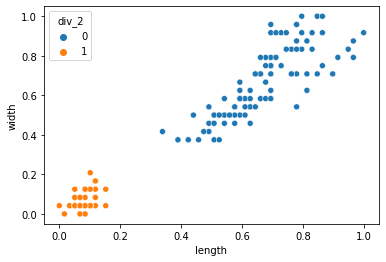

In [9]:
sns.scatterplot('length', 'width', hue='div_2', data=df)

<AxesSubplot:xlabel='length', ylabel='width'>

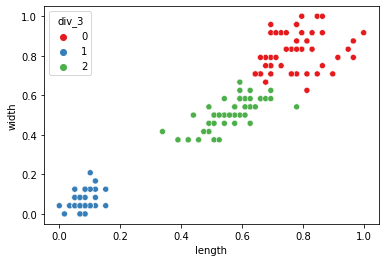

In [10]:
sns.scatterplot('length', 'width', hue='div_3', data=df, palette='Set1')

## With Pipeline

In [11]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KMeans(n_clusters=3)),
])

In [12]:
iris = load_iris()
df = pd.DataFrame(iris.data[:, 2:], columns=['length', 'width'])
df['div_3'] = clf.fit_predict(df[['length', 'width']])
df.sample(5)

,length,width,div_3
101,5.1,1.9,2
28,1.4,0.2,0
43,1.6,0.6,0
133,5.1,1.5,1
45,1.4,0.3,0


<AxesSubplot:xlabel='length', ylabel='width'>

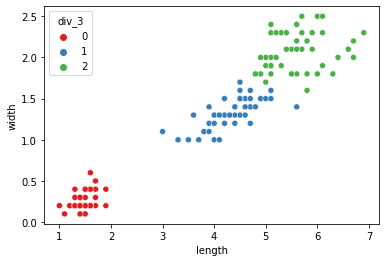

In [13]:
sns.scatterplot('length', 'width', hue='div_3', data=df, palette='Set1')